In [1]:
#linear Regression example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [6]:
np.random.seed((321))
slope_true  = 1.6
intercept_true = -2.0
noise = np.random.randn(21)
x = np.linspace(0.0, 10.0, 21)
y_true = slope_true * x + intercept_true
y_noisy = y_true + noise

In [7]:
slope_fitted, intercept_fitted = np.polyfit(x, y_noisy, 1)
slope_fitted, intercept_fitted

(1.5413417420130338, -1.9791228154444505)

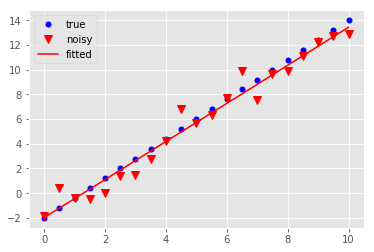

In [8]:
plt.plot(x, y_true, 'b.', ms=10, label=('true'))
plt.plot(x, y_noisy, 'rv', ms=8, label=('noisy'))
plt.plot(x, x * slope_fitted + intercept_fitted, 'r-', label='fitted')
plt.legend(loc=0)

In [10]:
from scipy.stats import linregress
result = linregress(x, y_noisy)
result.slope, result.intercept

(1.5413417420130338, -1.97912281544445)

In [11]:
result

LinregressResult(slope=1.5413417420130338, intercept=-1.97912281544445, rvalue=0.9833253996744622, pvalue=1.5784064002083441e-15, stderr=0.065395759139832005)

In [12]:
import pandas as pd
from statsmodels.formula.api import ols

In [15]:
data  = pd.DataFrame ({'x': x, 'y': y_noisy})
data.head()

,x,y
0,0.0,-1.827481
1,0.5,0.435483
2,1.0,-0.362664
3,1.5,-0.484150
4,2.0,0.056808


In [16]:
lm = ols(formula='y ~ x', data=data).fit()
print(lm.params)

Intercept   -1.979123
x            1.541342
dtype: float64


In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     555.5
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           1.58e-15
Time:                        00:51:31   Log-Likelihood:                -26.705
No. Observations:                  21   AIC:                             57.41
Df Residuals:                      19   BIC:                             59.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9791      0.382     -5.178      0.000      -2.779      -1.179
x              1.5413      0.065     23.569      0.000       1.404       1.678
==============================================================================
Omnibus:                        3.503   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.262
Skew:                           0.802   Prob(JB):                        0.323
Kurtosis:                       3.101   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

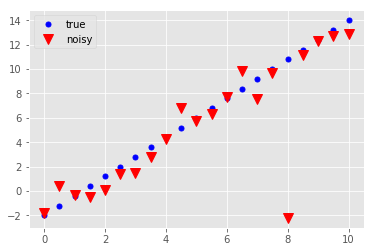

In [18]:
y_o = y_noisy.copy()
y_o[16] = -2.2
data_o = pd.DataFrame({'x': x, 'y': y_o})
plt.plot(x, y_true, 'b.', ms=10, label=('true'))
plt.plot(x, y_o, 'rv', ms=10, label=('noisy'))
plt.legend(loc=0)

In [19]:
fit = linregress(x, y_o)

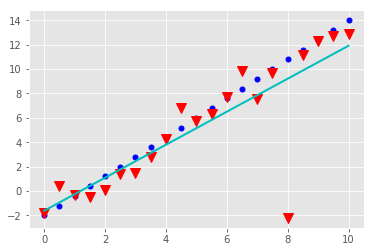

In [20]:
plt.plot(x, y_true, 'b.', ms=10, label=('true'))
plt.plot(x, y_o, 'rv', ms=10, label=('noisy'))
plt.plot(x, fit.slope * x + fit.intercept, 'c-', lw=2, label=('fitted'))

In [22]:
y_cleaned  = y_o.copy()
y_cleaned[16] = np.nan

In [23]:
y_cleaned

array([ -1.82748053,   0.43548253,  -0.3626636 ,  -0.48414969,
         0.05680774,   1.37863396,   1.45135042,   2.78026897,
         4.2657461 ,   6.79960004,   5.71639637,   6.29366018,
         7.66890842,   9.8522595 ,   7.56090439,   9.68734056,
                nan,  11.1433176 ,  12.27753328,  12.74893769,  12.90771626])

In [24]:
linregress(x, y_cleaned)

C:\Users\Muhammad Bilawal\Anaconda2\envs\pdap2018\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Muhammad Bilawal\Anaconda2\envs\pdap2018\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Muhammad Bilawal\Anaconda2\envs\pdap2018\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [28]:
import  numpy.ma as ma
ma.masked_invalid(y_cleaned)

masked_array(data = [-1.8274805310597482 0.4354825322180962 -0.3626635972475176
 -0.4841496854544173 0.0568077442796715 1.3786339600841844
 1.451350417444947 2.7802689652187755 4.265746100423404 6.799600043043521
 5.716396365787848 6.293660182680944 7.668908424206257 9.852259504952894
 7.5609043928400546 9.687340558740653 -- 11.143317603646777
 12.27753327602694 12.748937693026438 12.907716263649798],
             mask = [False False False False False False False False False False False False
 False False False False  True False False False False],
       fill_value = 1e+20)

In [30]:
import scipy.stats.mstats

In [32]:
scipy.stats.mstats.linregress(x, ma.masked_invalid(y_cleaned))

LinregressResult(slope=1.5486187935105644, intercept=-1.9932726378007599, rvalue=0.98286047099882035, pvalue=1.1393090208333758e-14, stderr=0.068463945460070105)

In [34]:
data_o.loc[16, 'y'] = np.nan

In [36]:
lm = ols(formula='y ~ x', data=data_o).fit()
lm.params

Intercept   -1.993273
x            1.548619
dtype: float64

In [37]:
from statsmodels.formula.api import rlm

In [39]:
data_o.loc[16, 'y'] = -2.2

In [41]:
lm = rlm(formula='y ~ x', data=data_o).fit()
lm.params

Intercept   -2.176574
x            1.548339
dtype: float64

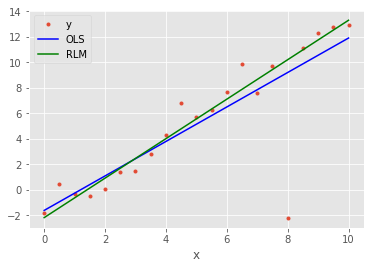

In [45]:
data_o.plot(x='x', y='y', style='.')
slope_noisy, intercept_noisy = np.polyfit(x, y_o, 1)
plt.plot(x, slope_noisy * x + intercept_noisy, 'b', label='OLS')
plt.plot(x, lm.params.x * x + lm.params.Intercept, 'g', label='RLM')
plt.legend()

In [47]:
def line(x, slope, intercept):
    return x * slope + intercept

In [48]:
from scipy.optimize import curve_fit

In [50]:
curve_fit(line, x, y_noisy)

(array([ 1.54134174, -1.97912282]), array([[ 0.00427661, -0.02138303],
        [-0.02138303,  0.14611735]]))

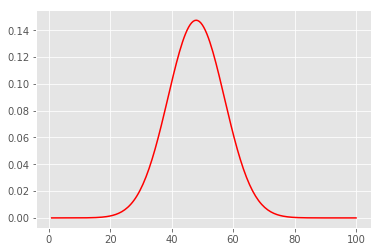

In [51]:
MU = 48.
SIGMA = 9.2
A = 3.4
X = np.linspace(1., 100., 201)
Y = A / (SIGMA * np.sqrt(2 * np.pi)) * np.exp(-(X - MU)**2 / (2.0 * SIGMA**2))
plt.plot(X, Y, 'r-')

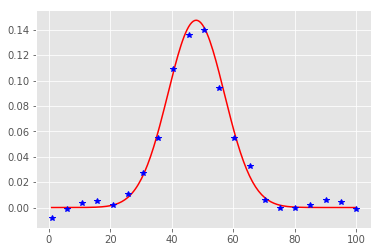

In [52]:
X_SAMPLE = X[::10]
Y_SAMPLE = Y[::10] + np.random.normal(scale=0.006, size=X_SAMPLE.size)
plt.plot(X, Y, 'r-')
plt.plot(X_SAMPLE, Y_SAMPLE, 'b*')

In [53]:
def gaussian(x, mu, sigma, a):
    return a / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu)**2 / 2 / sigma**2)

In [54]:
curve_fit(gaussian, X_SAMPLE, Y_SAMPLE,
          p0=[45., 1., 1.])

C:\Users\Muhammad Bilawal\Anaconda2\envs\pdap2018\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 4073.12518051,   351.69252912, -1168.17385462]),
 array([[ inf,  inf,  inf],
        [ inf,  inf,  inf],
        [ inf,  inf,  inf]]))

In [55]:
params, _ = curve_fit(gaussian, X_SAMPLE, Y_SAMPLE,
          p0=[45., 1., 1.],
          bounds=([-np.inf, 0., -np.inf], np.inf))
mu_fitted, sigma_fitted, a_fitted = params

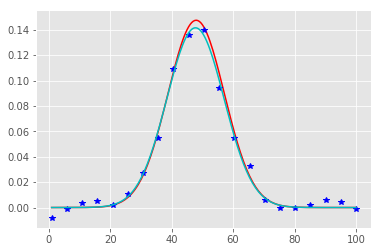

In [56]:
plt.plot(X, Y, 'r-')
plt.plot(X_SAMPLE, Y_SAMPLE, 'b*')
plt.plot(X, gaussian(X, mu_fitted,sigma_fitted, a_fitted),'c-')